# 2d molecular model of hard discs A

Lets put in the two-dimensional space 20 hard discs (radius=1.0) following the only two rules:

- Every disc must be in contact with at least another disc.
- Discs are hard, they can not overlap.

- Same radius for all discs
- Same center to center distance (bond distance) for every bonded pairs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
radius = 1.0
bond_length = 2.0
n_discs = 40

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random()
        new_center = bond_length*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center

Let's show now the figure of the resulting 2D random molecular model.

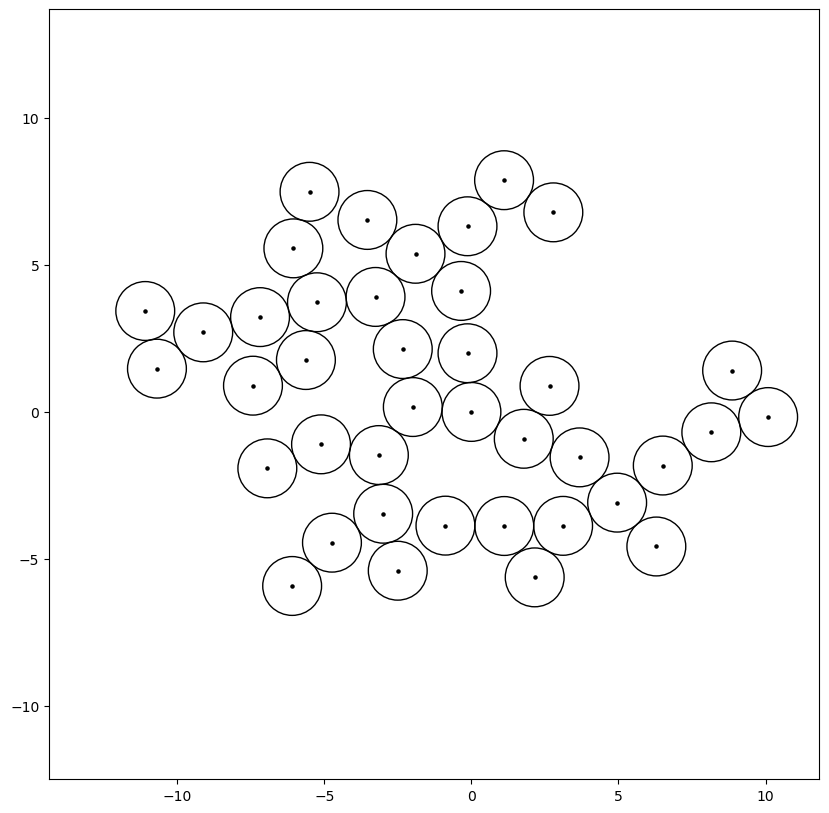

In [13]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Saving the model

In [14]:
radii = [1.0 for ii in range(n_discs)]
radii = np.array(radii)

In [15]:
import pickle

file = open('model_2d_A.pkl', 'wb')

pickle.dump('model 2d A', file)
pickle.dump(positions, file)
pickle.dump(radii, file)

file.close()